In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

# Add columns

In [119]:
bids = pd.read_csv('data/bids.csv', sep=',')
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [120]:
del bids['merchandise']

### BIDS: time_normalized

In [111]:
min_time = bids['time'].min()
bids['time_normalized'] = round((bids['time'] - min_time) * 19 / 1e9,2)

In [112]:
pd.DataFrame(bids.time_normalized.unique())
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_normalized
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,2419200.0
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,2419200.0
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,2419200.0
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,2419200.0
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,2419200.0


In [9]:
bids_cut = bids[:1000001]
bids_cut.tail()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
999996,999996,2f13d3d968cc52de9f8d50903d415b81vyx9g,2uu2n,mobile,phone1645,9764549052631578,gh,162.126.192.37,b6gh0q3vsbooxip
999997,999997,f54258c2e26abb410bf4733f7fde4671jf5a0,blkjh,home goods,phone28,9764549052631578,ng,202.115.203.241,r0jdzt5xhkybfrt
999998,999998,d9c6b6d7290e4475bcd6d264fb33a706fqtvc,3kg7y,mobile,phone93,9764549052631578,us,231.63.201.73,vasstdc27m7nks3
999999,999999,aa5f360084278b35d746fa6af3a7a1a5ra3xe,pyq31,home goods,phone150,9764549052631578,ae,0.236.41.154,3cd2r1o7u0wsqux
1000000,1000000,77f0bd275f68e66fd99b3f62669933edbzw86,mplj0,jewelry,phone318,9764549105263157,th,237.91.0.247,vasstdc27m7nks3


In [18]:
bidders_train = pd.read_csv('data/train.csv', sep=',')
bidders_train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [67]:
b_train = pd.read_csv('data/b_train.csv', sep=',')
b_train.head()

,bidder_id,outcome,mean_time_diff,total_bids_count
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,10851.13,24
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,61438.00,3
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,45201.00,4
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,NaN,1
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1477.80,155


In [19]:
bidders_test = pd.read_csv('data/test.csv', sep=',')
bidders_test.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


### total_auctions_count

In [68]:
b_train['total_auctions_count'] = 0

In [69]:
b_train.head()

,bidder_id,outcome,mean_time_diff,total_bids_count,total_auctions_count
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,10851.13,24,0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,61438.00,3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,45201.00,4,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,NaN,1,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1477.80,155,0


In [70]:
i = 0
for bidder in b_train['bidder_id'][:10]:
    if i % 100 == 0:
        print(i)
    i += 1
    c = bids[bids.bidder_id == bidder]['auction'].nunique()
    b_train.loc[b_train[b_train.bidder_id == bidder].index, 'total_auctions_count'] = c

0


### bids_per_auction

In [71]:
b_train['bids_per_auction'] = 0

In [72]:
b_train.head()

,bidder_id,outcome,mean_time_diff,total_bids_count,total_auctions_count,bids_per_auction
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,10851.13,24,18,0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,61438.00,3,1,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,45201.00,4,4,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,NaN,1,1,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1477.80,155,23,0


In [73]:
i = 0
for bidder in b_train['bidder_id'][:10]:
    if i % 100 == 0:
        print(i)
    i += 1
    c = bids[bids.bidder_id == bidder].groupby('auction')['bid_id'].nunique().mean()
    b_train.loc[b_train[b_train.bidder_id == bidder].index, 'bids_per_auction'] = c

0


In [76]:
b_train.head(20)

,bidder_id,outcome,mean_time_diff,total_bids_count,total_auctions_count,bids_per_auction
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,10851.13,24,18,1.333333
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,61438.00,3,1,3.000000
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,45201.00,4,4,1.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,NaN,1,1,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1477.80,155,23,6.739130
5,7eaefc97fbf6af12e930528151f86eb91bafh,0.0,NaN,1,1,1.000000
6,25558d24bca82beef0f9db4ba1fe2045ynnvq,0.0,30379.14,8,8,1.000000
7,88ae7a35e374a6fddd079ebb28c822eeohwse,0.0,3222.55,34,10,3.400000
8,57db69e32163f3e486dc6ef7d615aa12usje6,0.0,1296178.00,2,2,1.000000
9,d1be739798ba0745a1fd72ac918a9f1929hei,0.0,100964.38,14,10,1.400000


In [80]:
b_train.total_bids_count.divide(b_train.total_auctions_count)[:10]

0    1.333333
1    3.000000
2    1.000000
3    1.000000
4    6.739130
5    1.000000
6    1.000000
7    3.400000
8    1.000000
9    1.400000
dtype: float64

### mean_time_diff2

In [81]:
b_train['mean_time_diff2'] = 0
b_train.head()

,bidder_id,outcome,mean_time_diff,total_bids_count,total_auctions_count,bids_per_auction,mean_time_diff2
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,10851.13,24,18,1.333333,0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,61438.00,3,1,3.000000,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,45201.00,4,4,1.000000,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,NaN,1,1,1.000000,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1477.80,155,23,6.739130,0


In [53]:
bids[bids.bidder_id == '91a3c57b13234af24875c56fb7e2b2f4rb56a'].groupby('auction')['bid_id'].nunique().mean()

1.3333333333333333

In [85]:
bids[bids.bidder_id == '49bb5a3c944b8fc337981cc7a9ccae41u31d7'].sort_values(by='time')[['auction','time']]

,auction,time
2714053,cl3cf,9633126578947368
3785632,edggv,9638907631578947
5788255,jqx39,9698804842105263
6575051,jqx39,9703350263157894


In [114]:
bidder = '49bb5a3c944b8fc337981cc7a9ccae41u31d7'
time_diffs = []
for auction in bids[bids.bidder_id == bidder].sort_values(by='time_normalized')[['auction','time_normalized']].values:
    df = bids[bids.auction == auction[0]].sort_values(by='time_normalized')[['bidder_id', 'time_normalized']]
    df['diff'] = bids[bids.auction == auction[0]].sort_values(by='time_normalized')['time_normalized'] - bids[bids.auction == auction[0]].sort_values(by='time_normalized')['time_normalized'].shift(1)
    c = np.array(df[(df.bidder_id == bidder) & (df.time_normalized == auction[1])]['diff'])[0]
    time_diffs.append(c)
print(np.array(time_diffs).mean())

16.75


In [54]:
#b_train.to_csv('data/b_train.csv', sep=',', header=True, index=False)

In [108]:
for b in bids[bids.bidder_id == '49bb5a3c944b8fc337981cc7a9ccae41u31d7'].sort_values(by='time')[['auction','time']].values:
    print(b[1])

9633126578947368
9638907631578947
9698804842105263
9703350263157894


# Analysing

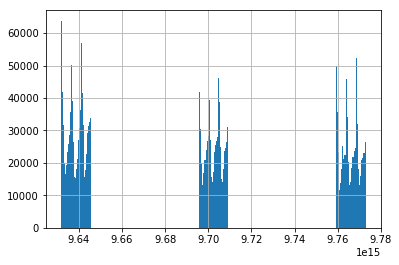

In [274]:
bids.time.hist(bins=1000)
#time_analyze = pd.concat([bids.time.sort_values(),
           #bids.time.sort_values().shift(1),
           #bids.time.sort_values().subtract(bids.time.sort_values().shift(1))], axis=1)
#time_analyze.columns = ['time', 'shifted_time', 'dt']
#(bids.time.subtract(bids.time.shift(1))).head()

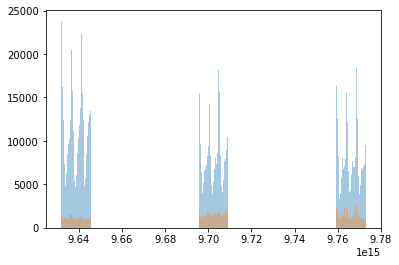

In [325]:
sns.distplot(bids[bids.outcome == 0][['time']], bins=1000, kde=False)#, hue=bids.outcome)
sns.distplot(bids[bids.outcome == 1][['time']], bins=1000, kde=False)#, hue=bids.outcome)
plt.show()

Let's analyse one human

In [ ]:
bids[bids.bidder_id == '624f258b49e77713fc34034560f93fb3hu3jo'].time_normalized

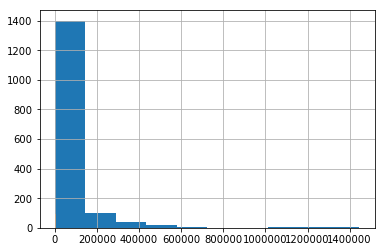

In [326]:
b_train[b_train.outcome == 0]['mean_time_diff'].hist()
b_train[b_train.outcome == 1]['mean_time_diff'].hist()

In [ ]:
plt.plot(b_train[b_train.outcome == 0]['mean_time_diff'])
plt.plot(b_train[b_train.outcome == 1]['mean_time_diff'])
plt.show()